In [33]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv("./dataset.csv", index_col='date')

# Display the first few rows to verify changes
data.head()

data.describe()

,Temperature,Humidity,Light,CO2
count,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832
std,1.020693,3.952844,208.221275,297.096114
min,19.500000,21.865000,0.000000,484.666667
25%,20.290000,26.642083,0.000000,542.312500
50%,20.790000,30.200000,0.000000,639.000000
75%,21.533333,32.700000,208.250000,831.125000
max,24.390000,39.500000,1581.000000,2076.500000


In [35]:
# Splitting the dataset into training and testing sets
train_size = int(len(data) * 0.7)
train, test = data.iloc[:train_size], data.iloc[train_size:]

train

,Temperature,Humidity,Light,CO2
date,,,,
2/11/2015 14:48,21.7600,31.133333,437.333333,1029.666667
2/11/2015 14:49,21.7900,31.000000,437.333333,1000.000000
2/11/2015 14:50,21.7675,31.122500,434.000000,1003.750000
2/11/2015 14:51,21.7675,31.122500,439.000000,1009.500000
2/11/2015 14:51,21.7900,31.133333,437.333333,1005.666667
...,...,...,...,...
2/16/2015 8:29,20.3900,24.290000,14.000000,819.000000
2/16/2015 8:30,20.3900,24.290000,14.000000,819.000000
2/16/2015 8:31,20.4450,24.340000,14.000000,823.000000


In [36]:
# Check for stationarity in the CO2 data
adf_result= adfuller(train["CO2"])


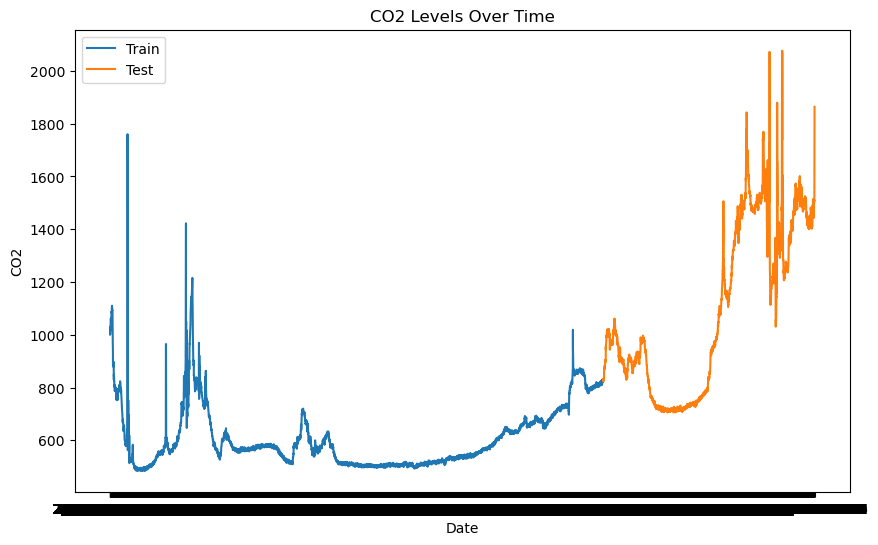

(-4.289931796058744,
 0.0004623874973212676,
 24,
 6801,
 {'1%': -3.4313118835294487,
  '5%': -2.8619650732864534,
  '10%': -2.56699626275952},
 58841.84296674194)

In [37]:
# Plot the CO2 data
plt.figure(figsize=(10, 6))
plt.plot(train['CO2'], label='Train')
plt.plot(test['CO2'], label='Test')
plt.title('CO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO2')
plt.legend()
plt.show()

adf_result


In [38]:
from pmdarima import auto_arima

 


In [39]:

train = train["C02"]
auto_model= auto_arima(train, seasonal=False, trace=True, error_action="ignore", suppress_warnings=True)
auto_model.summary()

KeyError: 'C02'